# **How to use cloudlink [GC]:**

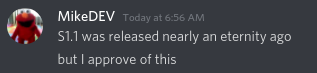

Cloudlink is not owned by [retronbv](https://github.com/retronbv). Cloudlink is owned by [MikeDev101](https://github.com/MikeDev101). Cloudlink [GC] is merely a way to run a cloudlink server on Google Colab.


1.   Click the run button on the cell below
2.   Scroll down below the code to input your ngrok auth token




In [ ]:
#!/usr/bin/env python3
!wget -O cloudlink.py https://raw.githubusercontent.com/MikeDev101/cloudlink/master/cloudlink/cloudlink.py
!pip install websocket-server
!pip install websocket-client
!pip install pyngrok
# CloudLink 3.0 - Server Mode Example Code
from pyngrok import ngrok
from cloudlink import CloudLink
import time
import os
clear = lambda: os.system('clear')
clear()
# Ask for the ngrok authtoken
print("Get your authtoken from https://dashboard.ngrok.com/auth")

authtoken = input("token > ")  # input your Ngrok auth token everytime you run the cell or simply replace "getpass.getpass()" with your token in "double quotes"
! ngrok authtoken $authtoken # login to ngrok

# Connect to ngrok
url = ngrok.connect(3000, 'tcp')
print('Your server address is ' + ((str(url).split('"')[1::2])[0]).replace('tcp://', ''))


if __name__ == "__main__":
    cl = CloudLink() # Instanciate the module
    try:
        cl.host(1234) # Start the module in server mode, host on port 3000
        
        while cl.mode == 1: # Some other spaghetti code to keep the script running while the connection is live
            time.sleep(0.1)
        
    except KeyboardInterrupt:
        cl.stop() # Stops the server and exits